# 5.2 Regression 

**Goal**: Predict next-day total energy consumption (in kWh)

● Target variable: Global_active_power.

● Evaluation: MAE, RMSE, R^2.

In [74]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

In [75]:
daily = pd.read_csv("./daily_household.csv")
daily['target'] = (daily['Global_active_power']).shift(-1)

In [76]:
for lag in [2, 3, 7, 14, 30]:
    daily[f"lag_{lag}"] = (
        daily["Global_active_power"].shift(lag)
    )

In [77]:
daily_clean = daily.dropna()
daily_clean.head()

,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,peak_hour_power,night_time_usage,...,Season_Spring,Season_Summer,Season_Winter,is_working_Day,target,lag_2,lag_3,lag_7,lag_14,lag_30
30,2007-01-15,35.811300,174.860,241.240910,6.261528,1.099,2.239,15.163,5.896,409.494,...,False,False,True,1,28.106733,53.113567,24.354933,37.356000,45.816733,20.152933
31,2007-01-16,28.106733,185.428,241.944757,4.975972,2.063,0.644,6.583,5.570,214.092,...,False,False,True,1,47.461467,50.183817,53.113567,31.150900,21.153933,56.507667
32,2007-01-17,47.461467,200.752,241.005250,8.283889,3.500,5.737,16.064,8.000,500.974,...,False,False,True,1,30.357700,35.811300,50.183817,35.913333,16.900900,36.730433
33,2007-01-18,30.357700,177.712,240.893597,5.342500,0.000,0.336,13.491,6.808,226.880,...,False,False,True,1,24.674000,28.106733,35.811300,37.586567,54.323533,27.769900
34,2007-01-19,24.674000,170.052,240.160944,4.376250,2.103,0.330,7.172,6.132,685.736,...,False,False,True,1,52.228867,47.461467,28.106733,24.354933,45.222733,37.095800


In [78]:
X = daily_clean.drop(columns=["target", "Datetime"])
y = daily_clean["target"]


train_size = int(len(daily_clean) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]


model_power = RandomForestRegressor(n_estimators=200, max_depth=None, random_state=42)
model_power.fit(X_train, y_train)
predictions = model_power.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
rmse = root_mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Average Power: {y_test.mean():.4f} kWh")
print(f"RMSE (Target is kWh): {rmse:.4f}")
print(f"R2: {r2}")

Mean Average Power: 23.9130 kWh
RMSE (Target is kWh): 5.4657
R2: 0.460198052996148


Debug

C:\Users\apost\AppData\Local\Temp\ipykernel_23720\2784953318.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')


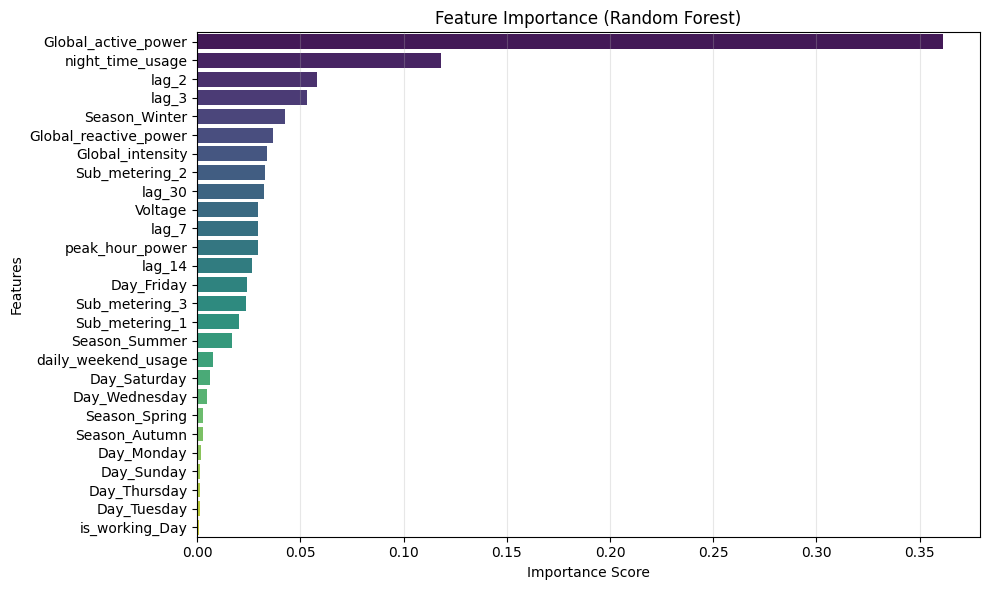

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# importances = model_power.feature_importances_
# feature_names = X.columns

# feature_imp_df = pd.DataFrame({
#     'Feature': feature_names,
#     'Importance': importances
# })

# feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False)

# plt.figure(figsize=(10, 6))
# sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')

# plt.title('Feature Importance (Random Forest)')
# plt.xlabel('Importance Score')
# plt.ylabel('Features')
# plt.grid(True, axis='x', alpha=0.3)
# plt.tight_layout()
# plt.show()